### Imports
The *gym_anytrading* and *crypto_env* imports are needed to create a gymnasium environment.

In [1]:
import utils
import crypto_env

import gym_anytrading
import gymnasium as gym
import matplotlib.pyplot as plt
import pandas as pd
import quantstats as qs
from train_and_test import train_and_get_rewards

from stable_baselines3 import A2C, PPO, DQN

### Defining the DataFrame

In [2]:
dataset_path = "data/crypto/ada-usd.csv"
dataset_type = "crypto-v0"  # "stocks-v0", "forex-v0", "crypto-v0"

df = pd.read_csv(
    dataset_path,
    header=0,
    parse_dates=["Date"],
    index_col="Date",
)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-11-09,0.032053,0.035060,0.025006,0.025160,18716200
2017-11-10,0.027119,0.033348,0.026451,0.032219,6766780
2017-11-11,0.027437,0.029659,0.025684,0.026891,5532220
2017-11-12,0.023977,0.027952,0.022591,0.027480,7280250
2017-11-13,0.025808,0.026300,0.023495,0.024364,4419440


### Creating the environment

In [3]:
seed = 69  # Nice
total_num_episodes = 10
total_learning_timesteps = 1000

window_size = 15
end_index = len(df)

env = gym.make(
    dataset_type,
    df=df,
    window_size=window_size,
    frame_bound=(window_size, end_index),
)

### Training and testing the model

1. With DQN
2. With Proximal Policy Optimization algorithm
3. With Advantage Actor Critique

Training DQN model…


Testing: 100%|██████████| 10/10 [00:08<00:00,  1.17it/s]



Results for DQN model:
Minimum reward: -47055.957
Maximum reward: 335314.062
Average reward: 72069.547

Total Profit = 1.37018173
ROI = 37.02%


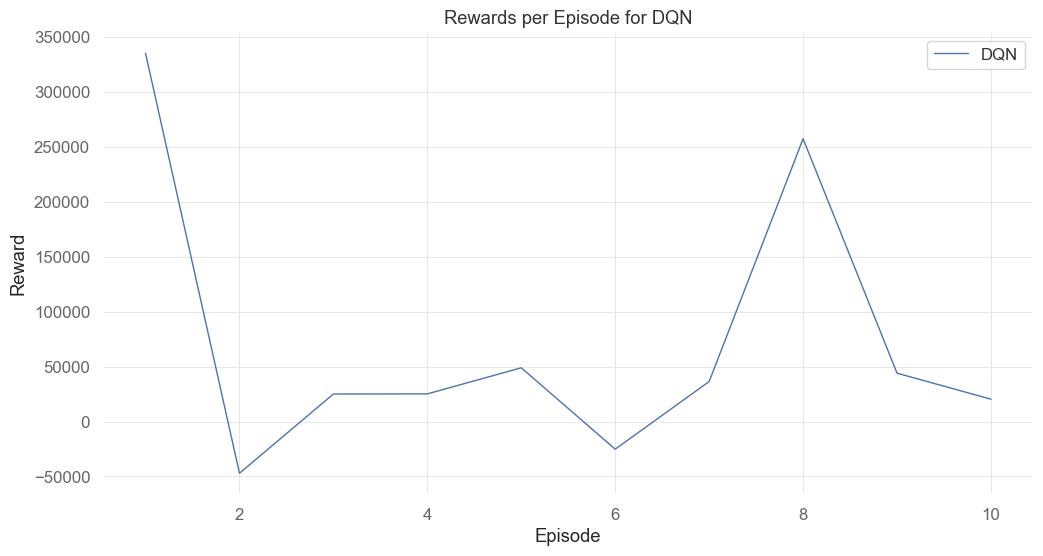

Training PPO model…


model.learn(): 2000it [00:02, 809.37it/s]                           
Testing: 100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


Results for PPO model:
Minimum reward: -137434.062
Maximum reward: 1378046.625
Average reward: 564155.625

Total Profit = 3.63045264
ROI = 263.05%


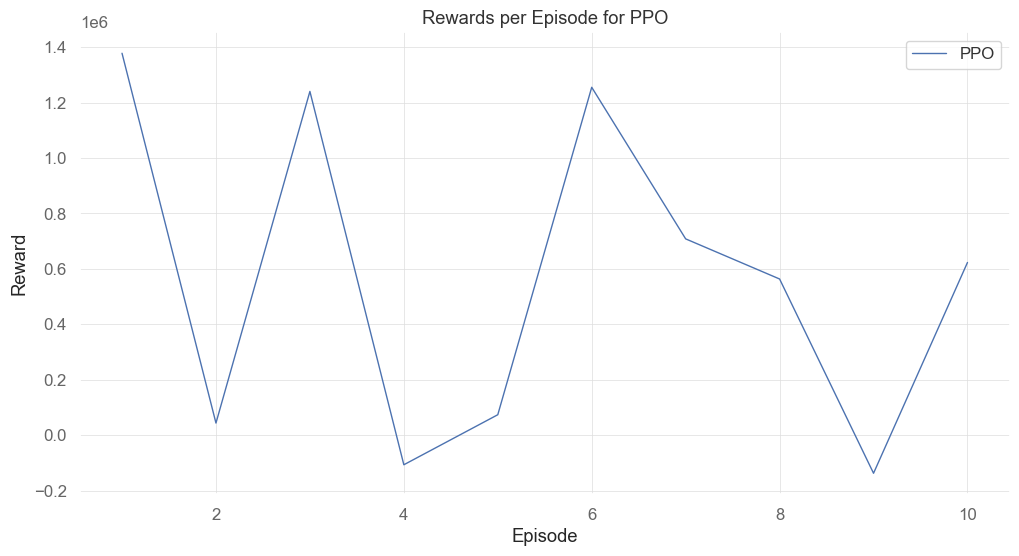

Training A2C model…


Testing: 100%|██████████| 10/10 [00:14<00:00,  1.45s/it]


Results for A2C model:
Minimum reward: -61298.715
Maximum reward: 1476741.250
Average reward: 478163.344

Total Profit = 1.28660310
ROI = 28.66%


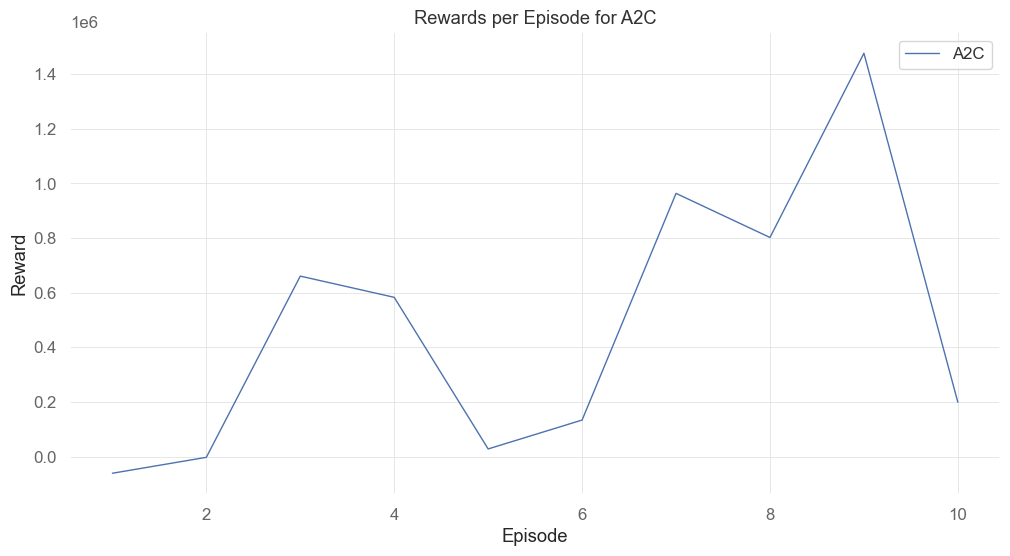

In [4]:
# Using the function in train_and_test.py
train_and_get_rewards("DQN", env, seed, total_learning_timesteps, total_num_episodes)
train_and_get_rewards("PPO", env, seed, total_learning_timesteps, total_num_episodes)
train_and_get_rewards("A2C", env, seed, total_learning_timesteps, total_num_episodes)